In [1]:
#yahoo finance as data source
import yfinance as yf

In [2]:
#See the yahoo finance ticker for the stock symbol
stock_symbol = 'GAIL.NS'

In [3]:
#last 5 years data with interval of 1 day
data = yf.download(tickers=stock_symbol,period='5y',interval='1d')

[*********************100%%**********************]  1 of 1 completed


In [4]:
import pandas as pd
type(data)

pandas.core.frame.DataFrame

In [5]:
data.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-08-06,81.333336,84.366669,81.099998,82.233330,64.870949,11113269
2019-08-07,82.933334,82.933334,80.400002,81.133331,64.003189,9397968
2019-08-08,81.000000,81.699997,79.733330,81.300003,64.604492,8556184
2019-08-09,81.466667,83.599998,80.400002,82.566666,65.611031,20829351
2019-08-13,83.233330,86.099998,82.666664,84.000000,66.750023,34185592
2019-08-14,84.466667,86.866669,84.166664,84.500000,67.147339,13371261
2019-08-16,85.800003,87.633331,82.833336,86.433334,68.683655,22987297
2019-08-19,86.966667,87.266663,84.400002,84.866669,67.438721,7594177
2019-08-20,85.000000,85.733330,83.933334,84.900002,67.465202,11768527


In [6]:
len(data)

1235

In [7]:
data.tail(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-07-24,219.000000,225.000000,218.100006,223.669998,223.669998,10123727
2024-07-25,222.000000,229.789993,218.970001,228.399994,228.399994,21033610
2024-07-26,230.000000,232.619995,229.240005,230.639999,230.639999,16686103
2024-07-29,231.500000,234.169998,230.000000,231.869995,231.869995,12472241
2024-07-30,233.699997,236.399994,231.899994,233.750000,233.750000,18713036
2024-07-31,241.000000,246.300003,238.460007,240.970001,240.970001,87632493
2024-08-01,242.949997,243.949997,237.119995,239.000000,239.000000,21967072
2024-08-02,236.389999,239.500000,232.100006,237.009995,237.009995,14930829
2024-08-05,230.000000,230.779999,221.000000,224.570007,224.570007,18627263


In [8]:
print("Null values:")
print(data.isnull().sum())

Null values:
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


<Axes: ylabel='Date'>

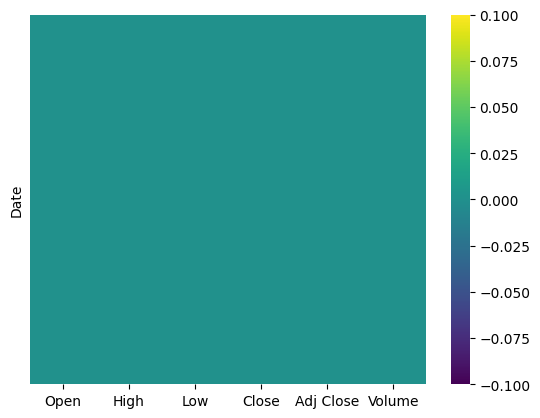

In [9]:
import seaborn as sns
sns.heatmap(data.isnull(),yticklabels=False,cbar=True,cmap="viridis")

In [10]:
opn = data[['Open']]

<Axes: xlabel='Date'>

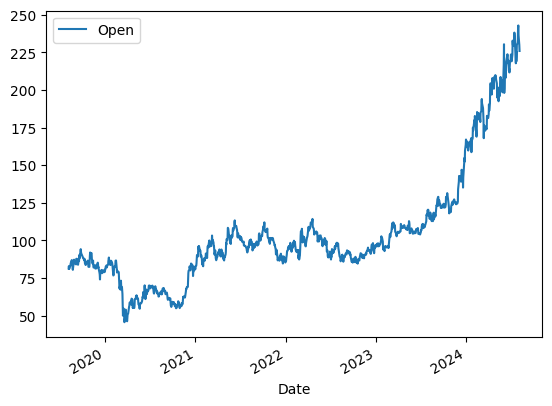

In [11]:
opn.plot()

In [12]:
import numpy as np
import matplotlib.pyplot as plt

<Figure size 1000x600 with 0 Axes>

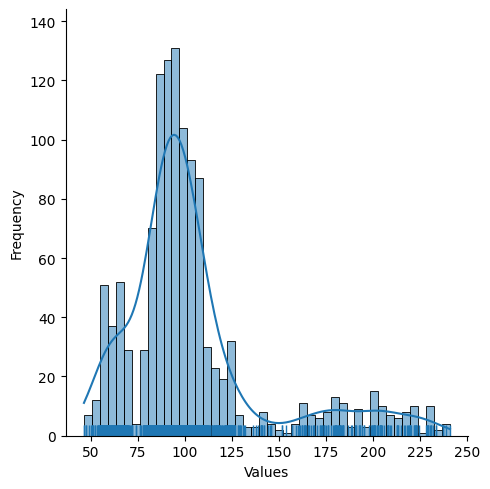

In [13]:
plt.figure(figsize=(10, 6))
sns.displot(data['Close'], kde=True, rug=True)
#plt.title('Histogram with Rug Plot - Outliers')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

<Figure size 1000x600 with 0 Axes>

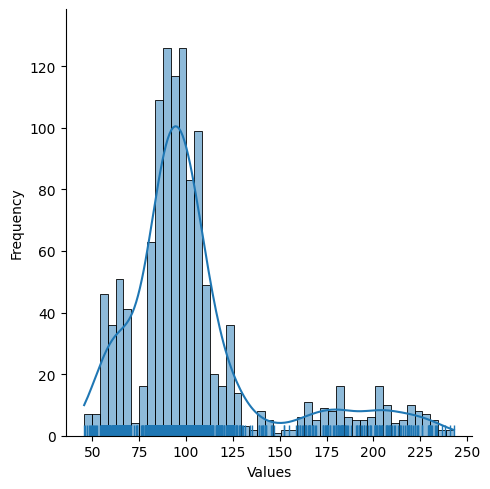

In [14]:
plt.figure(figsize=(10, 6))
sns.displot(data['Open'], kde=True, rug=True)
#plt.title('Histogram with Rug Plot - Outliers')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

<Figure size 1000x600 with 0 Axes>

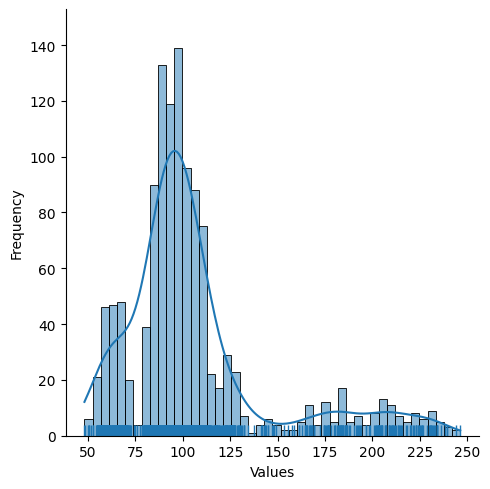

In [15]:
plt.figure(figsize=(10, 6))
sns.displot(data['High'], kde=True, rug=True)
#plt.title('Histogram with Rug Plot - Outliers')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

In [16]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

# Detect outliers using the IQR method
outliers = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)

# Print rows with outliers
print("Rows with outliers:")
print(data[outliers])

Rows with outliers:
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2020-02-11   82.300003   86.566666   82.133331   86.099998   68.418770   
2020-03-11   64.433334   65.033333   60.000000   60.333332   50.585205   
2020-03-12   56.666664   59.200001   52.733334   53.299999   44.688255   
2020-03-13   50.000000   61.099998   43.333332   56.366665   47.259434   
2020-03-17   52.333332   54.000000   48.633331   49.766666   41.725815   
...                ...         ...         ...         ...         ...   
2024-07-31  241.000000  246.300003  238.460007  240.970001  240.970001   
2024-08-01  242.949997  243.949997  237.119995  239.000000  239.000000   
2024-08-02  236.389999  239.500000  232.100006  237.009995  237.009995   
2024-08-05  230.000000  230.779999  221.000000  224.570007  224.570007   
2024-08-06  225.990005  230.559998  222.399994  222.830002  222.830002   

              Vol

In [17]:
dataT = data[~outliers]

# Print the modified dataset without outliers
print("Modified dataset without outliers:")
print(dataT)


Modified dataset without outliers:
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2019-08-06   81.333336   84.366669   81.099998   82.233330   64.870949   
2019-08-07   82.933334   82.933334   80.400002   81.133331   64.003189   
2019-08-08   81.000000   81.699997   79.733330   81.300003   64.604492   
2019-08-09   81.466667   83.599998   80.400002   82.566666   65.611031   
2019-08-13   83.233330   86.099998   82.666664   84.000000   66.750023   
...                ...         ...         ...         ...         ...   
2023-12-07  140.600006  143.699997  140.050003  142.050003  137.747833   
2023-12-11  140.050003  143.100006  139.750000  141.050003  136.778122   
2023-12-12  141.050003  141.600006  138.000000  138.750000  134.547775   
2023-12-13  139.050003  142.000000  138.500000  141.050003  136.778122   
2023-12-21  135.149994  141.000000  134.850006  140.699997  136.438705   

  

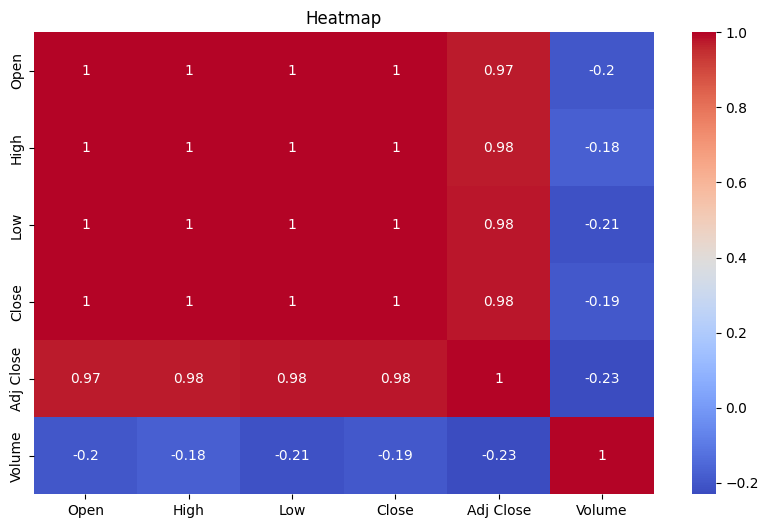

In [18]:
plt.figure(figsize=(10, 6))
sns.heatmap(dataT.corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap')
plt.show()

In [19]:
ds = opn.values

In [20]:
correlation_table = data.corr()

# Print the correlation table
print("Correlation Table:")
print(correlation_table)

Correlation Table:
               Open      High       Low     Close  Adj Close    Volume
Open       1.000000  0.999159  0.998344  0.997965   0.994009  0.058649
High       0.999159  1.000000  0.998275  0.999033   0.994720  0.078555
Low        0.998344  0.998275  1.000000  0.999161   0.995299  0.045321
Close      0.997965  0.999033  0.999161  1.000000   0.995940  0.063713
Adj Close  0.994009  0.994720  0.995299  0.995940   1.000000  0.046397
Volume     0.058649  0.078555  0.045321  0.063713   0.046397  1.000000


In [21]:
ds

array([[ 81.33333588],
       [ 82.93333435],
       [ 81.        ],
       ...,
       [236.38999939],
       [230.        ],
       [225.99000549]])

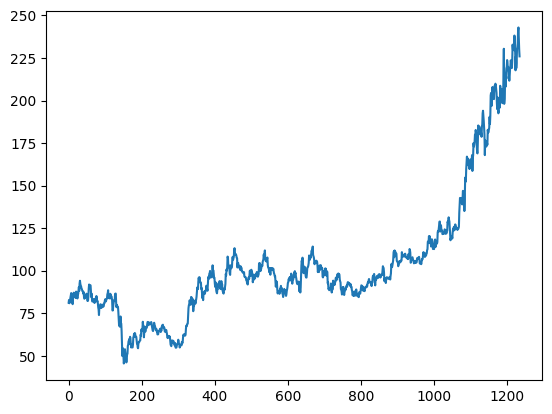

In [22]:
plt.plot(ds)

In [23]:
from sklearn.preprocessing import MinMaxScaler

In [24]:
#Using MinMaxScaler for normalizing data between 0 & 1
normalizer = MinMaxScaler(feature_range=(0,1))
ds_scaled = normalizer.fit_transform(np.array(ds).reshape(-1,1))

In [25]:
len(ds_scaled), len(ds)

(1235, 1235)

In [26]:
#Defining test and train data sizes
train_size = int(len(ds_scaled)*0.70)
test_size = len(ds_scaled) - train_size

In [27]:
train_size,test_size

(864, 371)

In [28]:
#Splitting data between train and test
ds_train, ds_test = ds_scaled[0:train_size,:], ds_scaled[train_size:len(ds_scaled),:1]

In [29]:
len(ds_train),len(ds_test)

(864, 371)

In [30]:
#creating dataset in time series for LSTM model
#X[100,120,140,160,180] : Y[200]
def create_ds(dataset,step):
    Xtrain, Ytrain = [], []
    for i in range(len(dataset)-step-1):
        a = dataset[i:(i+step), 0]
        Xtrain.append(a)
        Ytrain.append(dataset[i + step, 0])
    return np.array(Xtrain), np.array(Ytrain)

In [31]:
#Taking 100 days price as one record for training
time_stamp = 100
X_train, y_train = create_ds(ds_train,time_stamp)
X_test, y_test = create_ds(ds_test,time_stamp)

In [32]:
X_train.shape,y_train.shape

((763, 100), (763,))

In [33]:
X_test.shape, y_test.shape

((270, 100), (270,))

In [34]:
#Reshaping data to fit into LSTM model
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [35]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [36]:
#Creating LSTM model using keras
model = Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1],1)))
model.add(LSTM(units=50,return_sequences=True))
model.add(LSTM(units=50))
model.add(Dense(units=1,activation='linear'))
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 50)             │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [37]:
#Training model with adam optimizer and mean squared error loss function
model.compile(loss='mean_squared_error',optimizer='adam')
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64)

Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 10s 225ms/step - loss: 0.0197 - val_loss: 0.0903
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 177ms/step - loss: 0.0035 - val_loss: 0.0262
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 254ms/step - loss: 0.0017 - val_loss: 0.0268
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 170ms/step - loss: 0.0012 - val_loss: 0.0144
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 171ms/step - loss: 9.8854e-04 - val_loss: 0.0048
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 171ms/step - loss: 8.0991e-04 - val_loss: 0.0051
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 171ms/step - loss: 9.0332e-04 - val_loss: 0.0061
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 290ms/step - loss: 8.6767e-04 - val_loss: 0.0075
Epoch 9/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 174ms/step - loss: 8.8512e-04 - val_loss: 0.0053
Epoch 10/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 177ms/step - loss: 7.7645e-04 - val_loss: 0.0029
Epoch 11/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 176ms/step - loss: 6.9742e-04 - val_loss: 0.0033
Epoch 12/100

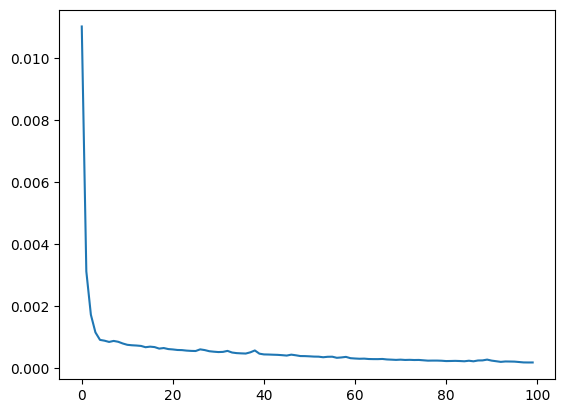

In [38]:
#PLotting loss, it shows that loss has decreased significantly and model trained well
loss = model.history.history['loss']
plt.plot(loss)

In [39]:
#Predicitng on train and test data
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


In [40]:
#Inverse transform to get actual value
train_predict = normalizer.inverse_transform(train_predict)
test_predict = normalizer.inverse_transform(test_predict)

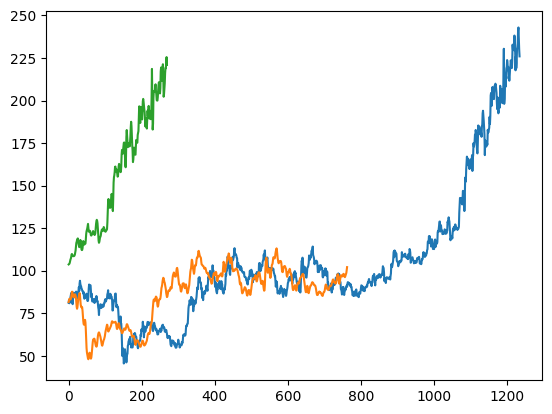

In [41]:
#Comparing using visuals
plt.plot(normalizer.inverse_transform(ds_scaled))
plt.plot(train_predict)
plt.plot(test_predict)

In [42]:
type(train_predict)

numpy.ndarray

In [43]:
test = np.vstack((train_predict,test_predict))

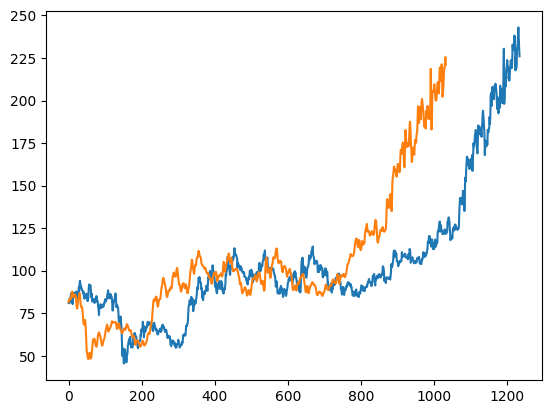

In [44]:
#Combining the predited data to create uniform data visualization
plt.plot(normalizer.inverse_transform(ds_scaled))
plt.plot(test)

In [45]:
len(ds_test)

371

In [46]:
#Getting the last 100 days records
fut_inp = ds_test[270:]

In [47]:
fut_inp = fut_inp.reshape(1,-1)

In [48]:
tmp_inp = list(fut_inp)

In [49]:
fut_inp.shape

(1, 101)

In [50]:
#Creating list of the last 100 data
tmp_inp = tmp_inp[0].tolist()

In [56]:
#Predicting next 30 days price suing the current data
#It will predict in sliding window manner (algorithm) with stride 1
lst_output=[]
n_steps=100
i=0
while(i<30):

    if(len(tmp_inp)>100):
        fut_inp = np.array(tmp_inp[1:])
        fut_inp=fut_inp.reshape(1,-1)
        fut_inp = fut_inp.reshape((1, n_steps, 1))
        yhat = model.predict(fut_inp, verbose=0)
        tmp_inp.extend(yhat[0].tolist())
        tmp_inp = tmp_inp[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        fut_inp = fut_inp.reshape((1, n_steps,1))
        yhat = model.predict(fut_inp, verbose=0)
        tmp_inp.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i=i+1


print(lst_output)

[[0.3510306775569916], [0.3469013571739197], [0.3430277705192566], [0.33940449357032776], [0.3360234498977661], [0.3328741490840912], [0.3299437165260315], [0.3272179961204529], [0.32468196749687195], [0.32232043147087097], [0.3201189935207367], [0.3180639147758484], [0.31614288687705994], [0.31434446573257446], [0.31265875697135925], [0.311076819896698], [0.30959078669548035], [0.3081936240196228], [0.30687904357910156], [0.3056412935256958], [0.30447518825531006], [0.30337586998939514], [0.3023388683795929], [0.30136004090309143], [0.30043524503707886], [0.299561083316803], [0.2987339496612549], [0.297950804233551], [0.2972085475921631], [0.2965043783187866]]


In [52]:
len(ds_scaled)

1235

In [61]:
#Creating a dummy plane to plot graph one after another
plot_new=np.arange(1,102)
plot_pred=np.arange(101,131)

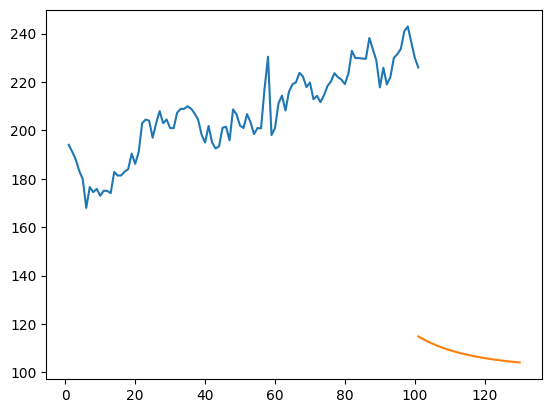

In [62]:
plt.plot(plot_new, normalizer.inverse_transform(ds_scaled[1134:]))
plt.plot(plot_pred, normalizer.inverse_transform(lst_output))

In [63]:
ds_new = ds_scaled.tolist()

In [64]:
len(ds_new)

1235

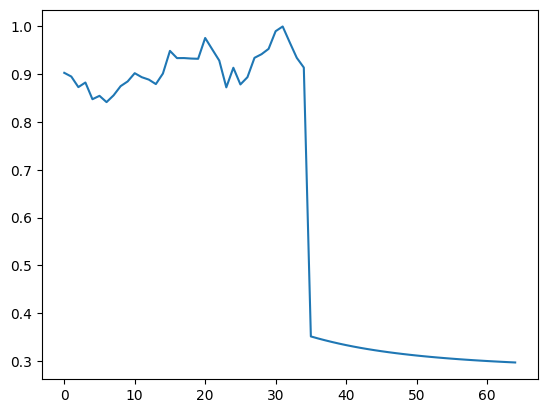

In [65]:
#Entends helps us to fill the missing value with approx value
ds_new.extend(lst_output)
plt.plot(ds_new[1200:])

In [66]:
#Creating final data for plotting
final_graph = normalizer.inverse_transform(ds_new).tolist()

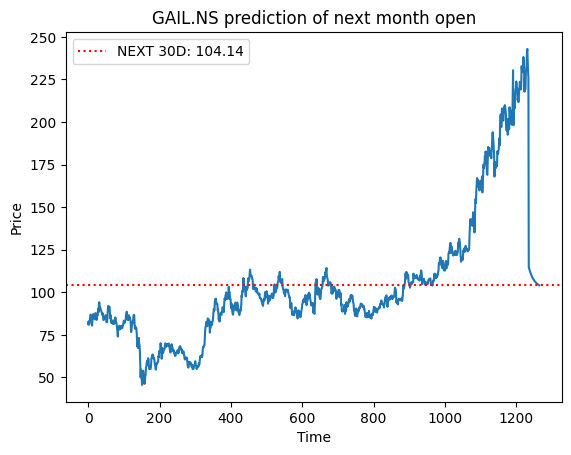

In [67]:
#Plotting final results with predicted value after 30 Days
plt.plot(final_graph,)
plt.ylabel("Price")
plt.xlabel("Time")
plt.title("{0} prediction of next month open".format(stock_symbol))
plt.axhline(y=final_graph[len(final_graph)-1], color = 'red', linestyle = ':', label = 'NEXT 30D: {0}'.format(round(float(*final_graph[len(final_graph)-1]),2)))
plt.legend()